In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/step - loss: 2.5315 - acc: 0.4956 - val_loss: 1.7211 - val_acc: 0.6100
Epoch 2/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.4456 - acc: 0.6883 - val_loss: 1.3464 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.0962 - acc: 0.7648 - val_loss: 1.1714 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.8708 - acc: 0.8165 - val_loss: 1.0824 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.7045 - acc: 0.8470 - val_loss: 0.9854 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.5688 - acc: 0.8789 - val_loss: 0.9417 - val_acc: 0.8010
Epoch 7/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.4615 - acc: 0.9024 - val_loss: 0.9083 - val_acc: 0.8020


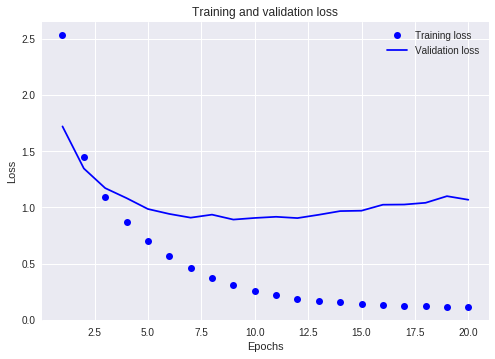

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

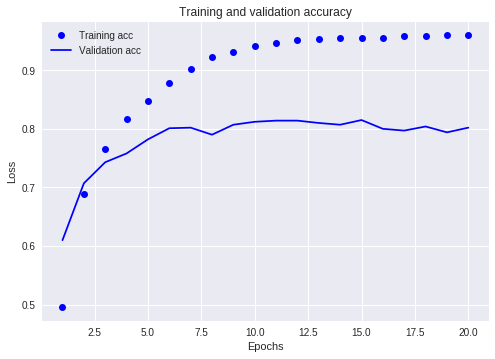

In [0]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 179us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 158us/step - loss: 1.3707 - acc: 0.7122 - val_loss: 1.2746 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 158us/step - loss: 1.0131 - acc: 0.7795 - val_loss: 1.1303 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.7971 - acc: 0.8254 - val_loss: 1.0527 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 161us/step - loss: 0.6388 - acc: 0.8628 - val_loss: 0.9755 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.5116 - acc: 0.8928 - val_loss: 0.9093 - val_acc: 0.8150
Epoch 7/9
7982/7982 [==============================] - 1s 158us/step - loss: 0.4109 - acc: 0.9147 - val_loss: 0.8909 - val_acc: 0.8200
Epoch 8

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[0].shape